## 1 Rol de las Capas Ocultas de una ANN
---

Como hemos discutido en clases, el modelo de neurona utilizando en la mayorıa de las redes neuronales artificiales corresponde esencialmente a un discriminante lineal sobre el espacio original de atributos. Por lo tanto, si se entrena una neurona para resolver un problema cuya solucion no es una funcion lineal de esos atributos debiesemos esperar un pobre rendimiento del modelo en la tarea. Un perceptron multicapas en cambio agrega un nivel adicional de procesamiento entrenado para aprender automaticamente una representacion adecuada al problema. En esta secci ́on experimentaremos esta idea revisitando un problema “de juguete” denominado moons.

In [8]:
import numpy as np
np.random.seed(1) #para usar los mismos numeros aleatorios

In [9]:
import matplotlib.pyplot as plt 
from matplotlib import gridspec
from ipywidgets import interact
import sklearn.datasets
%matplotlib inline

### Demostracion

Básicamente la primera parte del trabajo consiste en demostrar que una red de una sola neurona no pude ser clasificar con un grado de accuracy aceptable conjuntos de datos no linealmente separables. Sobre esto si bien esto es relevante para fines pedagógicos, en especialmente su visualización en un grafico, eso como problema científico ya esta plenamente demostrado en el trabajo de Minsky y Seymour[1]  con la limitación perceptron  con XOR. 

Por lo que usaremos la red neuronal (MPS) implementada para la actividad 2, pero primero limitada a 1 capa y 1 neurona y después como clasificar no lineal o sea un perceptron multicapa.  

Como se indico se probo clasificar els et de datos con un sola neora y solo se obtuvieron resultados similares al siguiente:

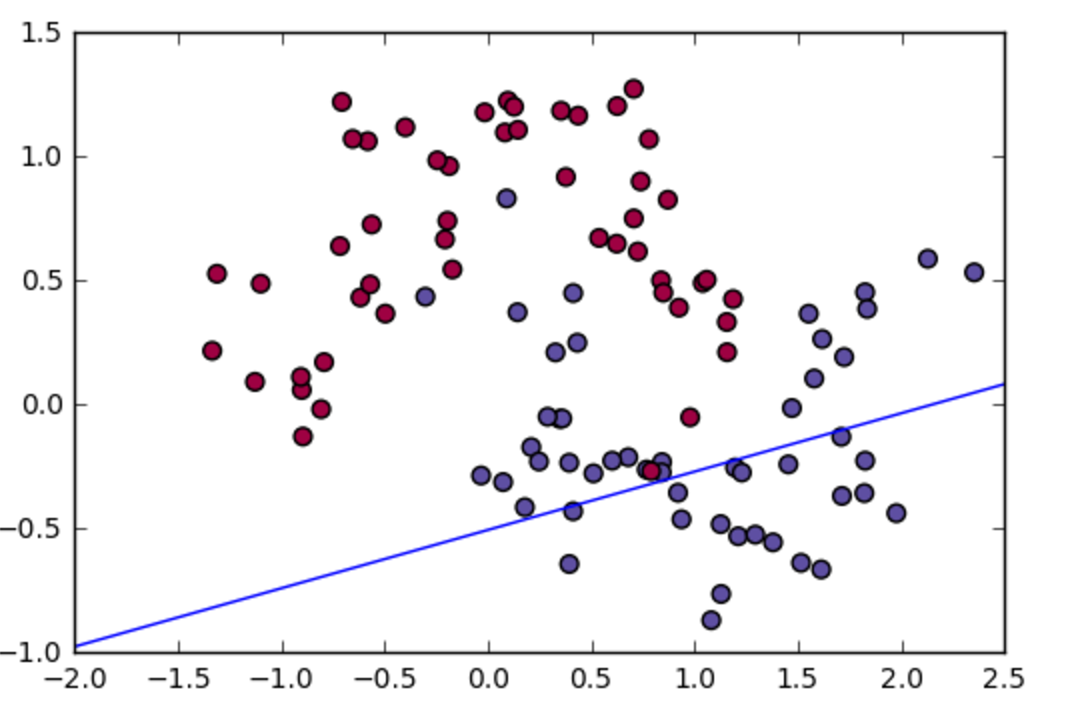

In [28]:
from IPython.display import Image
i = Image(filename='lineal.png', width=400, height=400)
i

En la sección DEMO se podrá visualizar el rol de las capas ocultas, asociada a la incorporación de funciones no lineales que le permiten al MPS poder clasificar conjuntos de datos claramente no linealmente separables.  

### [Demo](#Ejemplo) 

### Testing Data

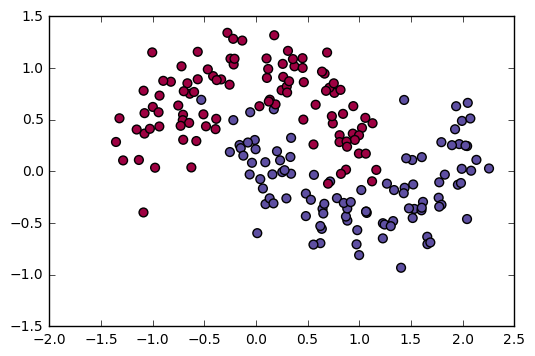

In [10]:
# Generate a dataset and plot it
np.random.seed(0)
X, y = sklearn.datasets.make_moons(200, noise=0.20)
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)

### Funcion iniciación

In [11]:
def iniciacion(_capa_entrada,_capa_escondida,_capa_salida):
    W1 = np.random.randn(_capa_entrada,_capa_escondida)
    W2 = np.random.randn(_capa_escondida,_capa_salida)
    print "Dimensiones de los datos de entrenamiento"+str(W1.shape)
    print "Dimensiones de los datos de entrenamiento"+str(W2.shape)
    return W1,W2

In [12]:
def learRate(n_lr):
    lear_rate = np.linspace(0,1,n_lr)
    return lear_rate

### Funcion de activación

In [13]:
def activacion(x):
    return 1/(1+np.exp(-x))

In [14]:
def activacionDerivada(x):
    return np.exp(-x)/((1+np.exp(-x))**2)

### Feedforward

In [15]:
def feedForward(X,W1,W2):
    z2 = np.dot(X, W1)
    a2 = activacion(z2)
    z3 = np.dot(a2, W2)
    Y_ = activacion(z3) 
    return z2,a2,z3,Y_

### Backpropagation

In [16]:
def backPropagation(Y_,X, y,z3,z2,a2,W2):
    #Capa salida - Capa Oculta  

    Y_[range(len(Y_)), y] -= 1
    delta3 = np.multiply(Y_, activacionDerivada(z3))
    dJdW2 = np.dot(a2.T, delta3)
    
    #Capa oculta - Capa entrada
    delta2 = np.dot(delta3, W2.T)*activacionDerivada(z2)
    dJdW1 = np.dot(X.T, delta2)  

    return dJdW1, dJdW2, delta2, delta3 

### Funcion externa para graficar

In [17]:
def plot_decision_boundary(pred_func):
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

### Evaluar

In [18]:
def evaluar(model, x):
    W1, W2 = model['W1'], model['W2']
    z2 = x.dot(W1)
    a2 = activacion(z2)
    z3 = a2.dot(W2)
    Y_ = activacion(z3)
    return np.argmax(Y_, axis=1)

### Modelo

In [19]:
def NN(_capa_entrada,_capa_escondida,_capa_salida, _epoch, _epsilon):
    
    W1, W2 = iniciacion(_capa_entrada,_capa_escondida,_capa_salida)
    
    redNeuronal = {}
    
    for i in xrange(0, _epoch):

        # Forward propagation
        z2,a2,z3,Y_ = feedForward(X,W1,W2)
        
        # Back propagation
        dJdW1, dJdW2, delta2, delta3 = backPropagation(Y_,X, y,z3,z2,a2,W2)

       # Ajuste Gradiente Descendente
        W1 += -_epsilon * dJdW1
        W2 += -_epsilon * dJdW2
        
        redNeuronal = { 'W1': W1, 'W2': W2}
    
    return redNeuronal

### Ejemplo

In [22]:
_capa_entrada    = 2 #El numero de nodos de esta capa esta determinado por la dimencionalidad de los datos de entrada
_capa_escondida  = 100
_capa_salida     = 2 
_epoch=1000
_epsilon  = learRate(20)

X_, y_ = sklearn.datasets.make_moons(200, noise=0.20)

In [23]:
def do_plot(_capa_escondida= _capa_escondida, _epoch=_epoch, _epsilon=_epsilon):
    plt.figure(figsize=(7, 7)) 
    X, y = sklearn.datasets.make_moons(200, noise=0.20)
    _capa_entrada    = 2
    _capa_salida= 2
    NeN = NN(_capa_entrada,_capa_escondida,_capa_salida, _epoch, _epsilon)
    plot_decision_boundary(lambda x: evaluar(NeN, x))
    plt.title("Numero de neuronas de la capa oculta "+str(_capa_escondida))
    plt.show()
interact(do_plot)

<function __main__.do_plot>

### Referencias

[1] Minsky, M., & Papert, S. (1971). Progress report on artificial intelligence.